In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [4]:
df = pd.read_csv("crop_recommendation.csv")

print(df.head())

print("\nshape of the dataset:",df.shape)

print("\n colums in dataset:",df.columns)

print("\ndataset info:")

print(df.info())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

shape of the dataset: (2200, 8)

 colums in dataset: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64


In [5]:
X = df.drop('label',axis=1)
y = df["label"]

print("input features (x):")

print(X.head(8))

print("\n traget lables(y)", y.head(8))


input features (x):
    N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340
5  69  37  42    23.058049  83.370118  7.073454  251.055000
6  69  55  38    22.708838  82.639414  5.700806  271.324860
7  94  53  40    20.277744  82.894086  5.718627  241.974195

 traget lables(y) 0    rice
1    rice
2    rice
3    rice
4    rice
5    rice
6    rice
7    rice
Name: label, dtype: object


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("training set size:",X_train.shape)
print("testing set size:",X_test.shape)

training set size: (1760, 7)
testing set size: (440, 7)


In [7]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train,y_train)

print("model training comleted.")


model training comleted.


Accuracy of the model: 99.32%

 classification report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00   

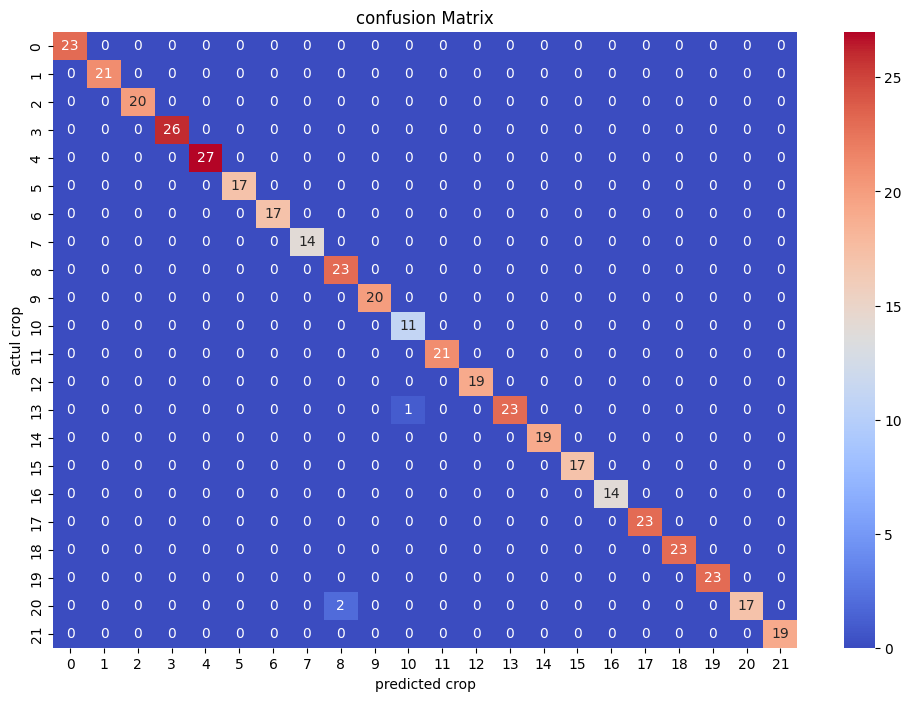

In [8]:
import seaborn as sns
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy of the model: {accuracy * 100:.2f}%")

print( "\n classification report:")
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
plt.title("confusion Matrix")
plt.xlabel("predicted crop")
plt.ylabel("actul crop")
plt.show()


In [ ]:
def predict_crop_from_input():
    print("enter the following values:")
    
    N = float(input("nitrogen(N):"))
    P = float(input("phosphorous(p):"))
    K = float(input("potassium(k):"))
    temperature = float(input("Temerature( c):"))
    humidity = float(input("humidity(%):"))
    ph = float(input("ph level:"))
    rainfall = float(input("rainfall (mm):"))
    
    
    input_data = np.array([[n,p,k,temperature,humidity,ph,rainfall]])
    
    prediceted_crop = model.predict(input_data)[0]
    
    print(f"\n based on the values entered, the recommend crop is : **{prediceted_crop.upper()}**")
    
    predict_crop_from_input()